In [9]:
import pandas as pd
import scipy.stats as stats
from sklearn import preprocessing as pp
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None)
data.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses','Class']

#data2 = pd.read_csv('Users/david/Downloads/breast-cancer-wisconsin.names', header=None)


In [10]:
#replace ? in data with NaN (mitose label)
data1 = data.drop(['Sample code'],axis=1)
data1 = data1.replace('?',np.NaN)

In [ ]:
#fill the NaN with the mean of Mitose
datan = data1.fillna(data1["Mitoses"].mean())

In [63]:
#check the missing values
print('Number of missing values:')
for col in datan.columns:
    print('\t%s: %d' % (col,datan[col].isna().sum()))

Number of missing values:
	Clump Thickness: 0
	Uniformity of Cell Size: 0
	Uniformity of Cell Shape: 0
	Marginal Adhesion: 0
	Single Epithelial Cell Size: 0
	Bare Nuclei: 0
	Bland Chromatin: 0
	Normal Nucleoli: 0
	Mitoses: 0
	Class: 0


In [64]:
#create features list
features=['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses']


#create the target list
target=['Class']

In [65]:
#create the features dataframe
xi=datan.loc[:,features].values

In [66]:
datan.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [67]:
#create the target array

y=datan.loc[:,target].values

In [68]:
#scale data in the feature dataframe.
x=StandardScaler().fit_transform(xi)
x1=xi

In [29]:
#specify 2PCA
pca = PCA(n_components=2)

In [95]:
#fit and transform the feature data

principleComponents = pca.fit_transform(xi)

In [96]:
principleComponents

array([[-4.42389374,  0.04385788],
       [ 4.85156071, -4.85279818],
       [-4.58168615, -0.61592332],
       ...,
       [10.33765792,  7.24240118],
       [ 6.4640025 ,  2.51321632],
       [ 7.5558443 ,  1.17737099]])

In [97]:
principleComponents.min()

-6.8452925094123565

In [98]:
#create target dataframe

target_df = pd.DataFrame(y,columns=["Class"])

In [99]:
target_df

,Class
0,2
1,2
2,2
3,2
4,2
...,...
694,2
695,2
696,4
697,4


In [100]:
#create feature PCA dataframe

PCAfeature_DF = pd.DataFrame(data=principleComponents,columns=['PCA1', 'PCA2'])

In [101]:
#combine the target and featue dataframes

final_df = pd.concat([PCAfeature_DF,target_df],axis=1)

In [102]:
PCAfeature_DF

,PCA1,PCA2
0,-4.423894,0.043858
1,4.851561,-4.852798
2,-4.581686,-0.615923
3,5.161758,3.411698
4,-4.059014,-0.096702
...,...,...
694,-4.916150,-0.454874
695,-5.903562,0.206888
696,10.337658,7.242401
697,6.464002,2.513216


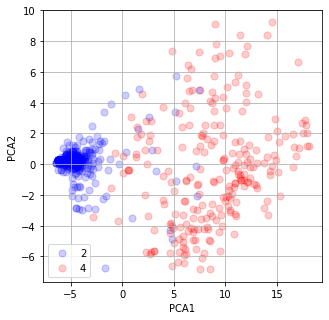

In [103]:
#plot the final dataframe

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
targets = [2,4]
colors = ['b','r']
shape = ("", "o")
for target,color,shape in zip(targets,colors,shape):
    d=final_df['Class']==target
    ax.scatter(final_df.loc[d,'PCA1'],final_df.loc[d,'PCA2'],c=color,s=50,marker=shape,alpha=0.3)
    
ax.grid()
ax.legend(targets,loc=3)

In [94]:
pca.explained_variance_ratio_

array([0.65456214, 0.08613063])